# Replication of Research Paper

In [1]:
import yfinance as yf
import pandas as pd

## Importing djia values

In [149]:
ticker = "^DJI"

# Download DJIA data (you can specify start and end dates)
djia_data = yf.download(ticker, start="2015-01-01", end="2019-12-31")

djia = pd.DataFrame(djia_data)

# Display the first few rows of the DataFrame
djia

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,17823.070312,17951.779297,17731.300781,17832.990234,17832.990234,76270000
2015-01-05,17821.300781,17821.300781,17475.929688,17501.650391,17501.650391,116160000
2015-01-06,17504.179688,17581.050781,17262.369141,17371.640625,17371.640625,101870000
2015-01-07,17374.779297,17597.080078,17374.779297,17584.519531,17584.519531,91030000
2015-01-08,17591.970703,17916.039062,17591.970703,17907.869141,17907.869141,114890000
...,...,...,...,...,...,...
2019-12-23,28491.779297,28582.490234,28491.779297,28551.529297,28551.529297,223530000
2019-12-24,28572.570312,28576.800781,28503.210938,28515.449219,28515.449219,86150000
2019-12-26,28539.460938,28624.099609,28535.150391,28621.390625,28621.390625,155970000


## Importing twitter dataset

In [140]:
#twitter data
tweets = pd.read_csv(r"C:\Users\Admin\Downloads\stock_market_tweets.csv")
# tweets  = pd.read_parquet("hf://datasets/TimKoornstra/synthetic-financial-tweets-sentiment/data/train-00000-of-00001.parquet")
tweets.rename(columns={'post_date': 'date', 'body':'Text'}, inplace=True)
# tweets.columns.values[5] = 'Text'
tweets.drop(columns=['Unnamed: 0', 'tweet_id', 'writer', 'comment_num', 'retweet_num', 'like_num', 'ticker_symbol'], inplace=True)

# tweets['date'] = pd.to_datetime(tweets['date'])

# # Remove the time part and keep only the date
# tweets['date'] = tweets['date'].dt.date
tweets

,date,Text
0,2015-01-01,Insanity of today weirdo massive selling. $aap...
1,2015-01-01,My biggest winner in 2014: Inverse Volatility ...
2,2015-01-01,Had a down day of -.66%. Worst performer was $...
3,2015-01-01,"YR %, /-, $TSLA 47.85%, $FB 42.77%, $TWTR -..."
4,2015-01-01,Prediction: $TWTR $GRPN $YELP are acquired as ...
...,...,...
1700636,2019-12-31,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar..."
1700637,2019-12-31,That $SPY $SPX puuump in the last hour was the...
1700638,2019-12-31,In 2020 I may start Tweeting out positive news...
1700639,2019-12-31,Patiently Waiting for the no twitter sitter tw...


In [139]:
unique_values_in_B = tweets['date'].nunique()
unique_values_in_B

1826

## Preprocessing twitter data

In [150]:
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# # Define tokenization function
# def tokenize_text(text):
#     return word_tokenize(text)

# # Apply tokenization to the 'text' column
# # tweets['tokens'] = tweets['Text'].apply(tokenize_text)

# tweets['text_no_punct'] = tweets['Text'].apply(translate(str.maketrans('', '', string.punctuation)))


# def preprocess_text(text):
#     # Tokenize
#     tokens = word_tokenize(text)
    
#     # Convert to lowercase
#     tokens = [word.lower() for word in tokens]
    
#     # Remove punctuation
#     tokens = [word for word in tokens if word.isalpha()]
    
#     # Remove stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = [word for word in tokens if word not in stop_words]
    
#     # Lemmatize
#     lemmatizer = WordNetLemmatizer()
#     tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
#     return tokens


# tweets['processed_tokens'] = tweets['Text'].apply(preprocess_text)
import spacy
from spacy.util import minibatch

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Assuming your text data is in a pandas DataFrame 'df' in a column 'text'
texts = tweets['Text'].tolist()  # Extract text from the DataFrame

# Process texts in batches using multiple CPU cores
docs = nlp.pipe(texts, batch_size=1000, n_process=4)  # 4 CPU cores

# Process the results and add them back to the DataFrame
processed_texts = []
for doc in docs:
    tokens = [token.text for token in doc]
    processed_texts.append(tokens)

tweets['processed_text'] = processed_texts
tweets

KeyboardInterrupt: 

## Feeding into Mood analyzer : Vader and Hugging Face(BERT)

In [6]:
#perform mood categorization: vader and hugging face(BERT)

#vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment
def analyze_sentiment(tokens):
    # Join tokens to form a text string
    text = ' '.join(tokens)
    # Get sentiment scores
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

# Analyze sentiment for each processed text
tweets['Vader_Scores'] = tweets['processed_tokens'].apply(analyze_sentiment)

In [151]:
#Hugging Face(BERT)
# from transformers import pipeline

# # # Load the sentiment analysis pipeline
# sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', device=0)

# # # Analyze sentiment
# def joiner(tokens):
#     text = ' '.join(tokens)
#     return text

# tweets['Joined_Texts'] = tweets['processed_tokens'].apply(joiner)
# results = sentiment_pipeline(tweets['Joined_Texts'].tolist(), batch_size=8)
# results_df = pd.DataFrame(results)
# tweets = pd.concat([tweets, results_df], axis=1)
# tweets


# from transformers import pipeline

# # Load the sentiment analysis pipeline with GPU
# classifier = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english', device=0)  # device=0 for GPU

# # Process texts in batches
# tweets['BERT_sentiment'] = tweets['Text'].apply(lambda x: classifier(x))
# tweets

import torch
from transformers import pipeline
from multiprocessing import Pool

# Initialize Hugging Face sentiment analysis pipeline with GPU support
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', device=0)

# Batch processing for faster execution
def analyze_batch(batch):
    return sentiment_pipeline(batch, batch_size=32)  # Batch size set to 32

# Multiprocessing function to split the DataFrame into batches and run sentiment analysis
def parallel_sentiment_analysis(texts, n_processes=4):
    with Pool(processes=n_processes) as pool:
        results = pool.map(analyze_batch, [texts[i:i+100] for i in range(0, len(texts), 100)])  # 100 texts per batch
    # Flatten the results
    return [item for sublist in results for item in sublist]

# Apply parallel processing to the 'text' column of your DataFrame
tweets['BERT_sentiment_results'] = parallel_sentiment_analysis(tweets['Text'].tolist(), n_processes=4)

# Extract label and score from the result and create new columns
tweets['BERT_sentiment'] = tweets['BERT_sentiment_results'].apply(lambda x: x['label'])
tweets['BERT_score'] = tweets['BERT_sentiment_results'].apply(lambda x: x['score'])

# Show DataFrame with the results
tweets

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


KeyboardInterrupt: 

In [28]:
def adjust_score(row):
    if row['label'] == 'NEGATIVE':
        return -row['score']  # Make the score negative if the label is NEGATIVE
    else:
        return row['score']  # Keep the score as is if POSITIVE

# Apply the function to adjust the scores
tweets['adjusted_score'] = tweets.apply(adjust_score, axis=1)
tweets

,Tweet_ID,Text,Timestamp,processed_tokens,Vader_Scores,Joined_Texts,label,score,date,vader_compound,adjusted_BERT_score,adjusted_score
0,1,Party least receive say or single. Prevent pre...,2023-01-30 11:00:51,"[party, least, receive, say, single, prevent, ...","{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",party least receive say single prevent prevent...,NEGATIVE,0.840604,2023-01-30,0.8885,None,-0.840604
1,2,Hotel still Congress may member staff. Media d...,2023-01-02 22:45:58,"[hotel, still, congress, may, member, staff, m...","{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp...",hotel still congress may member staff medium d...,NEGATIVE,0.989919,2023-01-02,0.2960,None,-0.989919
2,3,Nice be her debate industry that year. Film wh...,2023-01-18 11:25:19,"[nice, debate, industry, year, film, generatio...","{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'comp...",nice debate industry year film generation push...,POSITIVE,0.926224,2023-01-18,0.8481,None,0.926224
3,4,Laugh explain situation career occur serious. ...,2023-04-10 22:06:29,"[laugh, explain, situation, career, occur, ser...","{'neg': 0.044, 'neu': 0.774, 'pos': 0.182, 'co...",laugh explain situation career occur serious f...,POSITIVE,0.988701,2023-04-10,0.6249,None,0.988701
4,5,Involve sense former often approach government...,2023-01-24 07:12:21,"[involve, sense, former, often, approach, gove...","{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",involve sense former often approach government...,NEGATIVE,0.947850,2023-01-24,0.6705,None,-0.947850
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Agree reflect military box ability ever hold. ...,2023-01-15 11:46:20,"[agree, reflect, military, box, ability, ever,...","{'neg': 0.112, 'neu': 0.591, 'pos': 0.297, 'co...",agree reflect military box ability ever hold i...,POSITIVE,0.985860,2023-01-15,0.8126,None,0.985860
9996,9997,Born which push still. Degree sometimes contro...,2023-05-06 00:46:54,"[born, push, still, degree, sometimes, control...","{'neg': 0.137, 'neu': 0.625, 'pos': 0.238, 'co...",born push still degree sometimes control space...,NEGATIVE,0.985683,2023-05-06,0.5859,None,-0.985683
9997,9998,You day agent likely region. Teacher data mess...,2023-02-27 14:55:08,"[day, agent, likely, region, teacher, data, me...","{'neg': 0.06, 'neu': 0.888, 'pos': 0.052, 'com...",day agent likely region teacher data message b...,NEGATIVE,0.997510,2023-02-27,-0.0772,None,-0.997510
9998,9999,Guess without successful save. Particular natu...,2023-01-09 16:09:35,"[guess, without, successful, save, particular,...","{'neg': 0.112, 'neu': 0.472, 'pos': 0.415, 'co...",guess without successful save particular natur...,POSITIVE,0.990906,2023-01-09,0.9246,None,0.990906


## Plotting Mood Values with respect to time

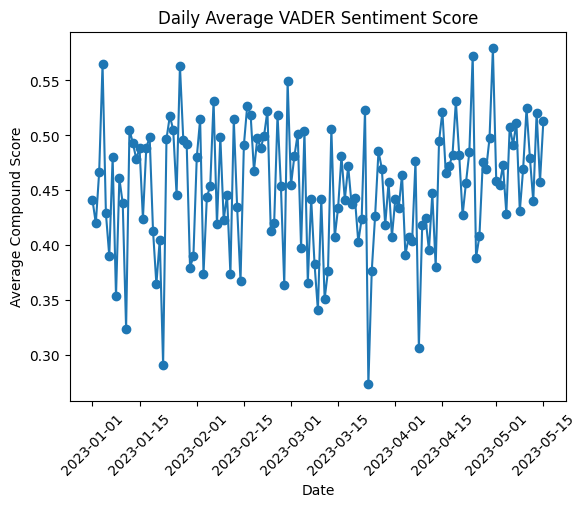

,Tweet_ID,Text,processed_tokens,Vader_Scores,Joined_Texts,label,date,vader_compound,adjusted_BERT_score,adjusted_score
0,1,Party least receive say or single. Prevent pre...,"[party, least, receive, say, single, prevent, ...","{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",party least receive say single prevent prevent...,NEGATIVE,2023-01-30,0.8885,None,-0.840604
1,2,Hotel still Congress may member staff. Media d...,"[hotel, still, congress, may, member, staff, m...","{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp...",hotel still congress may member staff medium d...,NEGATIVE,2023-01-02,0.2960,None,-0.989919
2,3,Nice be her debate industry that year. Film wh...,"[nice, debate, industry, year, film, generatio...","{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'comp...",nice debate industry year film generation push...,POSITIVE,2023-01-18,0.8481,None,0.926224
3,4,Laugh explain situation career occur serious. ...,"[laugh, explain, situation, career, occur, ser...","{'neg': 0.044, 'neu': 0.774, 'pos': 0.182, 'co...",laugh explain situation career occur serious f...,POSITIVE,2023-04-10,0.6249,None,0.988701
4,5,Involve sense former often approach government...,"[involve, sense, former, often, approach, gove...","{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",involve sense former often approach government...,NEGATIVE,2023-01-24,0.6705,None,-0.947850
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Agree reflect military box ability ever hold. ...,"[agree, reflect, military, box, ability, ever,...","{'neg': 0.112, 'neu': 0.591, 'pos': 0.297, 'co...",agree reflect military box ability ever hold i...,POSITIVE,2023-01-15,0.8126,None,0.985860
9996,9997,Born which push still. Degree sometimes contro...,"[born, push, still, degree, sometimes, control...","{'neg': 0.137, 'neu': 0.625, 'pos': 0.238, 'co...",born push still degree sometimes control space...,NEGATIVE,2023-05-06,0.5859,None,-0.985683
9997,9998,You day agent likely region. Teacher data mess...,"[day, agent, likely, region, teacher, data, me...","{'neg': 0.06, 'neu': 0.888, 'pos': 0.052, 'com...",day agent likely region teacher data message b...,NEGATIVE,2023-02-27,-0.0772,None,-0.997510
9998,9999,Guess without successful save. Particular natu...,"[guess, without, successful, save, particular,...","{'neg': 0.112, 'neu': 0.472, 'pos': 0.415, 'co...",guess without successful save particular natur...,POSITIVE,2023-01-09,0.9246,None,0.990906


In [32]:
import matplotlib.pyplot as plt

tweets[['neg', 'neu', 'pos', 'vader_compound']] = tweets['Vader_Scores'].apply(pd.Series)
tweets.drop(columns=['neg', 'neu', 'pos'], inplace=True)

# Assuming 'df' is your pandas DataFrame and you want to plot 'column1' vs 'column2'

# # Convert 'timestamp' to datetime format
# tweets['Timestamp'] = pd.to_datetime(tweets['Timestamp'])

# # Remove the time part and keep only the date
# tweets['date'] = tweets['Timestamp'].dt.date

# Group by 'date' and calculate the mean of the 'compound' score
daily_avg = tweets.groupby('date')['vader_compound'].mean().reset_index()

# # Plot the daily average sentiment score
plt.plot(daily_avg['date'], daily_avg['vader_compound'], label='Compound Average', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.title('Daily Average VADER Sentiment Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
tweets

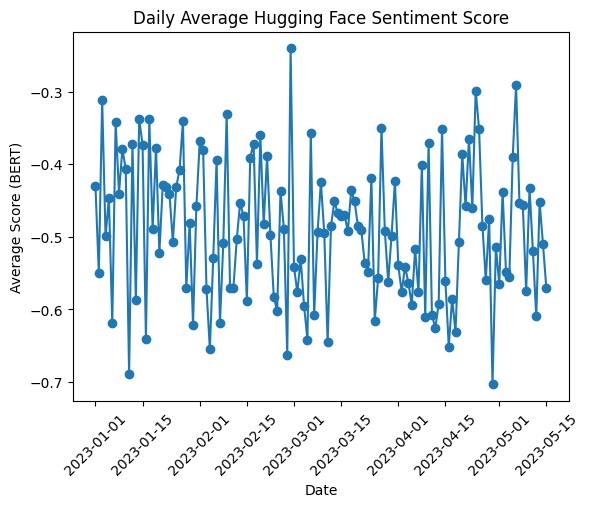

,Tweet_ID,Text,processed_tokens,Vader_Scores,Joined_Texts,label,date,vader_compound,adjusted_BERT_score,adjusted_score
0,1,Party least receive say or single. Prevent pre...,"[party, least, receive, say, single, prevent, ...","{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",party least receive say single prevent prevent...,NEGATIVE,2023-01-30,0.8885,None,-0.840604
1,2,Hotel still Congress may member staff. Media d...,"[hotel, still, congress, may, member, staff, m...","{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp...",hotel still congress may member staff medium d...,NEGATIVE,2023-01-02,0.2960,None,-0.989919
2,3,Nice be her debate industry that year. Film wh...,"[nice, debate, industry, year, film, generatio...","{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'comp...",nice debate industry year film generation push...,POSITIVE,2023-01-18,0.8481,None,0.926224
3,4,Laugh explain situation career occur serious. ...,"[laugh, explain, situation, career, occur, ser...","{'neg': 0.044, 'neu': 0.774, 'pos': 0.182, 'co...",laugh explain situation career occur serious f...,POSITIVE,2023-04-10,0.6249,None,0.988701
4,5,Involve sense former often approach government...,"[involve, sense, former, often, approach, gove...","{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",involve sense former often approach government...,NEGATIVE,2023-01-24,0.6705,None,-0.947850
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Agree reflect military box ability ever hold. ...,"[agree, reflect, military, box, ability, ever,...","{'neg': 0.112, 'neu': 0.591, 'pos': 0.297, 'co...",agree reflect military box ability ever hold i...,POSITIVE,2023-01-15,0.8126,None,0.985860
9996,9997,Born which push still. Degree sometimes contro...,"[born, push, still, degree, sometimes, control...","{'neg': 0.137, 'neu': 0.625, 'pos': 0.238, 'co...",born push still degree sometimes control space...,NEGATIVE,2023-05-06,0.5859,None,-0.985683
9997,9998,You day agent likely region. Teacher data mess...,"[day, agent, likely, region, teacher, data, me...","{'neg': 0.06, 'neu': 0.888, 'pos': 0.052, 'com...",day agent likely region teacher data message b...,NEGATIVE,2023-02-27,-0.0772,None,-0.997510
9998,9999,Guess without successful save. Particular natu...,"[guess, without, successful, save, particular,...","{'neg': 0.112, 'neu': 0.472, 'pos': 0.415, 'co...",guess without successful save particular natur...,POSITIVE,2023-01-09,0.9246,None,0.990906


In [33]:
#plotting BERT
daily_avg = tweets.groupby('date')['adjusted_score'].mean().reset_index()

# # Plot the daily average sentiment score
plt.plot(daily_avg['date'], daily_avg['adjusted_score'], label='score (BERT) Average', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Score (BERT)')
plt.title('Daily Average Hugging Face Sentiment Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
tweets

In [36]:
# tweets.drop(columns=['adjusted_BERT_score'], inplace=True)

In [37]:
tweets

,Tweet_ID,Text,processed_tokens,Vader_Scores,Joined_Texts,label,date,vader_compound,adjusted_score
0,1,Party least receive say or single. Prevent pre...,"[party, least, receive, say, single, prevent, ...","{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",party least receive say single prevent prevent...,NEGATIVE,2023-01-30,0.8885,-0.840604
1,2,Hotel still Congress may member staff. Media d...,"[hotel, still, congress, may, member, staff, m...","{'neg': 0.0, 'neu': 0.916, 'pos': 0.084, 'comp...",hotel still congress may member staff medium d...,NEGATIVE,2023-01-02,0.2960,-0.989919
2,3,Nice be her debate industry that year. Film wh...,"[nice, debate, industry, year, film, generatio...","{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'comp...",nice debate industry year film generation push...,POSITIVE,2023-01-18,0.8481,0.926224
3,4,Laugh explain situation career occur serious. ...,"[laugh, explain, situation, career, occur, ser...","{'neg': 0.044, 'neu': 0.774, 'pos': 0.182, 'co...",laugh explain situation career occur serious f...,POSITIVE,2023-04-10,0.6249,0.988701
4,5,Involve sense former often approach government...,"[involve, sense, former, often, approach, gove...","{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",involve sense former often approach government...,NEGATIVE,2023-01-24,0.6705,-0.947850
...,...,...,...,...,...,...,...,...,...
9995,9996,Agree reflect military box ability ever hold. ...,"[agree, reflect, military, box, ability, ever,...","{'neg': 0.112, 'neu': 0.591, 'pos': 0.297, 'co...",agree reflect military box ability ever hold i...,POSITIVE,2023-01-15,0.8126,0.985860
9996,9997,Born which push still. Degree sometimes contro...,"[born, push, still, degree, sometimes, control...","{'neg': 0.137, 'neu': 0.625, 'pos': 0.238, 'co...",born push still degree sometimes control space...,NEGATIVE,2023-05-06,0.5859,-0.985683
9997,9998,You day agent likely region. Teacher data mess...,"[day, agent, likely, region, teacher, data, me...","{'neg': 0.06, 'neu': 0.888, 'pos': 0.052, 'com...",day agent likely region teacher data message b...,NEGATIVE,2023-02-27,-0.0772,-0.997510
9998,9999,Guess without successful save. Particular natu...,"[guess, without, successful, save, particular,...","{'neg': 0.112, 'neu': 0.472, 'pos': 0.415, 'co...",guess without successful save particular natur...,POSITIVE,2023-01-09,0.9246,0.990906


In [104]:
daily_avg = pd.DataFrame(tweets.groupby('date')['vader_compound'].mean().reset_index())

In [105]:
daily_avg

,date,vader_compound
0,2023-01-01,0.441403
1,2023-01-02,0.419718
2,2023-01-03,0.466686
3,2023-01-04,0.564981
4,2023-01-05,0.428924
...,...,...
130,2023-05-11,0.479586
131,2023-05-12,0.439974
132,2023-05-13,0.520597
133,2023-05-14,0.457700


In [47]:
daily_avg2 = pd.DataFrame(tweets.groupby('date')['adjusted_score'].mean().reset_index())

In [48]:
daily_avg2

,date,adjusted_score
0,2023-01-01,-0.429569
1,2023-01-02,-0.550264
2,2023-01-03,-0.311806
3,2023-01-04,-0.499304
4,2023-01-05,-0.446699
...,...,...
130,2023-05-11,-0.519231
131,2023-05-12,-0.609594
132,2023-05-13,-0.452197
133,2023-05-14,-0.510476


In [49]:
daily_avg.reset_index(drop=True, inplace=True)
daily_avg2.reset_index(drop=True, inplace=True)

# Concatenate DataFrames horizontally (along columns)
mood_series = pd.concat([daily_avg, daily_avg2], axis=1)
mood_series

,date,vader_compound,date,adjusted_score
0,2023-01-01,0.441403,2023-01-01,-0.429569
1,2023-01-02,0.419718,2023-01-02,-0.550264
2,2023-01-03,0.466686,2023-01-03,-0.311806
3,2023-01-04,0.564981,2023-01-04,-0.499304
4,2023-01-05,0.428924,2023-01-05,-0.446699
...,...,...,...,...
130,2023-05-11,0.479586,2023-05-11,-0.519231
131,2023-05-12,0.439974,2023-05-12,-0.609594
132,2023-05-13,0.520597,2023-05-13,-0.452197
133,2023-05-14,0.457700,2023-05-14,-0.510476


In [51]:
mood_series = mood_series.drop(mood_series.columns[2], axis=1)

In [52]:
mood_series

,vader_compound,adjusted_score
0,0.441403,-0.429569
1,0.419718,-0.550264
2,0.466686,-0.311806
3,0.564981,-0.499304
4,0.428924,-0.446699
...,...,...
130,0.479586,-0.519231
131,0.439974,-0.609594
132,0.520597,-0.452197
133,0.457700,-0.510476


## Preprocessing DJIA before Granger Causality

In [38]:
djia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-02-28,12689.280273,12689.440430,12536.429688,12582.179688,12582.179688,247270000
2008-02-29,12579.580078,12580.150391,12223.570312,12266.389648,12266.389648,351870000
2008-03-03,12264.360352,12281.370117,12161.049805,12258.900391,12258.900391,259730000
2008-03-04,12259.139648,12259.230469,12032.419922,12213.799805,12213.799805,347720000
2008-03-05,12204.929688,12349.669922,12140.530273,12254.990234,12254.990234,304570000
...,...,...,...,...,...,...
2008-12-15,8628.809570,8676.280273,8469.030273,8564.530273,8564.530273,229940000
2008-12-16,8565.650391,8958.790039,8565.650391,8924.139648,8924.139648,337190000
2008-12-17,8921.910156,8961.259766,8778.070312,8824.339844,8824.339844,239260000


In [54]:
djia['D1'] = djia['Close'].diff()
djia

,Open,High,Low,Close,Adj Close,Volume,D1
Date,,,,,,,
2022-12-15,33773.000000,33773.000000,33016.160156,33202.218750,33202.218750,394290000,NaN
2022-12-16,33166.460938,33166.460938,32654.589844,32920.460938,32920.460938,756310000,-281.757812
2022-12-19,32921.449219,33038.941406,32581.970703,32757.539062,32757.539062,326430000,-162.921875
2022-12-20,32735.240234,32992.230469,32649.449219,32849.738281,32849.738281,303970000,92.199219
2022-12-21,33028.089844,33437.839844,33028.089844,33376.480469,33376.480469,328020000,526.742188
...,...,...,...,...,...,...,...
2023-05-08,33715.148438,33747.488281,33509.230469,33618.691406,33618.691406,225680000,-55.687500
2023-05-09,33589.851562,33656.398438,33509.718750,33561.808594,33561.808594,232940000,-56.882812
2023-05-10,33707.199219,33772.089844,33239.449219,33531.328125,33531.328125,271180000,-30.480469


In [110]:
# djia = djia.dropna()
# djia_delta = pd.DataFrame(djia['D1'])
djia_delta
# daily_avg

,Date,D1
0,2022-12-16,-281.757812
1,2022-12-19,-162.921875
2,2022-12-20,92.199219
3,2022-12-21,526.742188
4,2022-12-22,-348.992188
...,...,...
96,2023-05-08,-55.687500
97,2023-05-09,-56.882812
98,2023-05-10,-30.480469
99,2023-05-11,-221.816406


## Granger Causality

In [62]:
# daily_avg.drop(columns=['date'], inplace=True)
# daily_avg

In [108]:
# djia_delta = djia_delta.reset_index()
# djia_delta
daily_avg.rename(columns={'date': 'Date'}, inplace=True)
daily_avg

,Date,vader_compound
0,2023-01-01,0.441403
1,2023-01-02,0.419718
2,2023-01-03,0.466686
3,2023-01-04,0.564981
4,2023-01-05,0.428924
...,...,...
130,2023-05-11,0.479586
131,2023-05-12,0.439974
132,2023-05-13,0.520597
133,2023-05-14,0.457700


In [115]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

# Sample DataFrames
# Assume `djia` and `mood_scores` are DataFrames with 'Date' as index and 'Value' columns
# Combine them into one DataFrame
# djia_delta['Date'] = pd.to_datetime(djia_delta['Date'])
# daily_avg['Date'] = pd.to_datetime(daily_avg['Date'])
# data = pd.merge(djia_delta, daily_avg, on='Date', how='inner')
# # data.columns = ['DJIA_D', 'Mood_Score_Vader']
# data.drop(columns=['Date'], inplace=True)
# data
# # Check for stationarity
# # def test_stationarity(series):
# #     result = adfuller(series)
# #     print(f'ADF Statistic: {result[0]}')
# #     print(f'p-value: {result[1]}')

# # # Test stationarity
# # test_stationarity(data['DJIA_D'])
# # test_stationarity(data['Mood_Score_Vader'])

# # Dropna the data if needed
# data_diff = data.dropna()

# # Perform Granger Causality Test
max_lag = 5  # You can choose a different maximum lag length
test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3874  , p=0.2420  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=1.4353  , p=0.2309  , df=1
likelihood ratio test: chi2=1.4240  , p=0.2328  , df=1
parameter F test:         F=1.3874  , p=0.2420  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8509  , p=0.4307  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=1.8032  , p=0.4059  , df=2
likelihood ratio test: chi2=1.7852  , p=0.4096  , df=2
parameter F test:         F=0.8509  , p=0.4307  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3106  , p=0.8177  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=1.0122  , p=0.7983  , df=3
likelihood ratio test: chi2=1.0064  , p=0.7997  , df=3
parameter F test:         F=0.3106  , p=0.8177  , df_denom=81, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3967  , p=0.8105  , df_d

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


#### Granger test needs to be redone, not done correctly